In [ ]:
## PCA Analysis 

In [ ]:
## Loading packages, changing directory

In [8]:
import os
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
os.chdir(r"C:\Users\jeffm\Documents\old_pc_data\good_data\Users\jeffd\Documents\Studying\Data Mining\Final Project")

In [4]:
os.getcwd()

'C:\\Users\\jeffm\\Documents\\old_pc_data\\good_data\\Users\\jeffd\\Documents\\Studying\\Data Mining\\Final Project'

In [ ]:
## Loading Data into Dataframe

In [6]:
tornado_df = pd.read_excel('clean_tornado.xlsx', index_col=0) 

In [7]:
tornado_df

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,casualty_event?,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1950-01-03,39600,3,MO,29,1,...,casualty_event,6,0.0,38.77,-90.22,38.83,-90.03,9.50,150,0
1,2,1950,1,3,1950-01-03,42900,3,IL,17,2,...,casualty_event,5,0.0,39.10,-89.30,39.12,-89.23,3.60,130,0
2,3,1950,1,3,1950-01-03,57600,3,OH,39,1,...,casualty_event,4,0.0,40.88,-84.58,0.00,0.00,0.10,10,0
3,4,1950,1,13,1950-01-13,19500,3,AR,5,1,...,casualty_event,3,0.0,34.40,-94.37,0.00,0.00,0.60,17,0
4,5,1950,1,25,1950-01-25,70200,3,MO,29,2,...,casualty_event,5,0.0,37.60,-90.68,37.63,-90.65,2.30,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60109,607506,2015,12,28,2015-12-28,12000,3,LA,22,0,...,no_casualty,0,0.0,30.08,-90.54,30.08,-90.53,0.60,150,0
60110,613277,2015,12,28,2015-12-28,17160,3,AR,5,0,...,no_casualty,4,0.0,34.70,-90.92,34.78,-90.90,5.75,40,0
60111,607307,2015,12,28,2015-12-28,20580,3,MS,28,0,...,no_casualty,5,0.0,31.54,-89.53,31.61,-89.49,5.59,100,0
60112,612738,2015,12,28,2015-12-28,30600,3,FL,12,0,...,no_casualty,4,0.0,30.76,-87.24,30.77,-87.23,0.78,75,0


In [ ]:
## Data Processing, PCA work 

In [ ]:
## From the above dataframe we assessed the best independant variables that can map to the response variable given our 
## understanding of the topic can be built into PCA components.  The four variables of interest for explanatory variables were
## property loss from tornadoes in dollar value, the same loss but for crop value in dollars because tornadoes mainly affect
## farming territories, the length of a tornado, and width of a tornado.  The response variable is a binary output variable:
## If 1 or more casualties occurred or an event where no casualties occurred.  

In [9]:
from sklearn.preprocessing import StandardScaler

features = ['loss', 'closs', 'len', 'wid']
# Separating out the features
x = tornado_df.loc[:, features].values
# Separating out the target
y = tornado_df.loc[:,['casualty_event?']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [13]:
finalDf = pd.concat([principalDf, tornado_df[['casualty_event?']]], axis = 1)

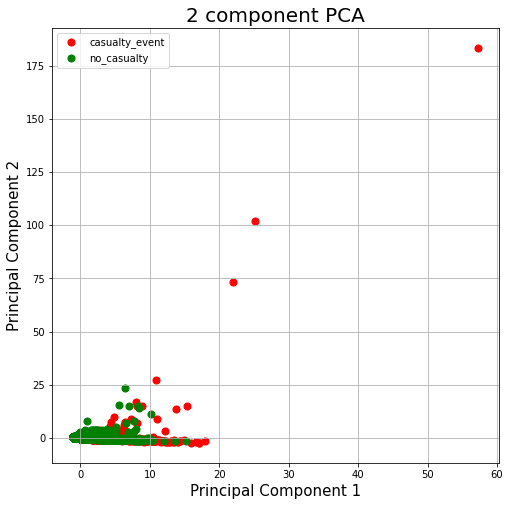

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['casualty_event', 'no_casualty']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['casualty_event?'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
pca.explained_variance_ratio_

array([0.41177382, 0.24602887])

In [ ]:
## The PCA was able to take our 4 independant variables of interest and develop two components in the graph above.  The 
## component mapping was off in our graph due to the presence of outliers that had an excess effect on the response variable.
## The issue is that for the domain of weather and specifically tornadoes, we cannot amend or remove these outliers as the 
## individual events themselves are important to the analysis.  Regardless, the first two components explain about 66% of the 
## response so 2/3 of the outcome is explain which is pretty substantial, even though its possible that a large number of 
## smaller factors could increment this amount with more components, so this analysis is a good cutoff for now.

In [ ]:
## LDA Analysis

In [ ]:
## Data Processing, PCA work 

In [ ]:
## Below work used the same input and output variables as above but now using an LDA algorithm.  This would help to see if 
## linear discriminants in directions could explain the connection between input and output variables.  

In [18]:
x_LDA = tornado_df[["loss", "closs", "len", "wid"]]
y_LDA = tornado_df[["casualty_event?"]]

In [19]:
x_LDA.head()

,loss,closs,len,wid
0,6,0.0,9.5,150
1,5,0.0,3.6,130
2,4,0.0,0.1,10
3,3,0.0,0.6,17
4,5,0.0,2.3,300


In [20]:
y_LDA.head()

,casualty_event?
0,casualty_event
1,casualty_event
2,casualty_event
3,casualty_event
4,casualty_event


In [22]:
LDA_df = tornado_df[["loss", "closs", "len", "wid", "casualty_event?"]]

In [25]:
tornado_target_names = ['casualty_event', 'no_casualty']
class_feature_means = pd.DataFrame(columns=tornado_target_names)
for c, rows in LDA_df.groupby("casualty_event?"):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\jeffm\AppData\Local\Temp/ipykernel_19756/3460996241.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,casualty_event,no_casualty
loss,4.741807,2.197479
closs,0.010537,0.000936
len,10.482621,2.481703
wid,235.624833,78.883440


In [26]:
within_class_scatter_matrix = np.zeros((4,4))
for c, rows in LDA_df.groupby("casualty_event?"):
    rows = rows.drop(["casualty_event?"], axis=1)
    
    s = np.zeros((4,4))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(4,1), class_feature_means[c].values.reshape(4,1)
        
    s += (x - mc).dot((x - mc).T)
    
    within_class_scatter_matrix += s

In [27]:
feature_means = LDA_df.mean()
between_class_scatter_matrix = np.zeros((4,4))
for c in class_feature_means:    
    n = len(LDA_df.loc[LDA_df["casualty_event?"] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(4,1), feature_means.values.reshape(4,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

C:\Users\jeffm\AppData\Local\Temp/ipykernel_19756/2012007379.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = LDA_df.mean()


In [28]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [29]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

1.6246291449858056e-05
1.6940658945086007e-21
1.0499203499322205e-21
1.0939422874008955e-22


In [30]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 1.0
Eigenvector 1: 1.0427400614700913e-16
Eigenvector 2: 6.462523174428178e-17
Eigenvector 3: 6.73348924446664e-18


In [ ]:
## Double Check Through Algorithm

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_LDA_algo = lda.fit_transform(x_LDA, y_LDA)

C:\Users\jeffm\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
lda.explained_variance_ratio_

array([1.])

IndexError: index 1 is out of bounds for axis 1 with size 1

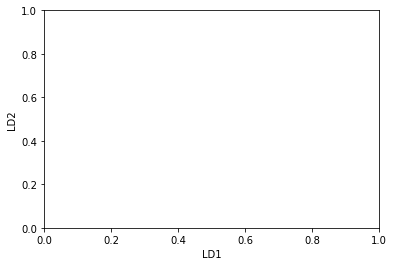

In [33]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_LDA_algo[:,0],
    X_LDA_algo[:,1],
    c=y_LDA,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [ ]:
## Above we can see that the LDA was not able to discern between the two types of components and grouped everything within the 
## 1st component.  I believe this is due to the fact that our data is too non-linear and LDA builds discriminant directions
## off linearity.  